In [215]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.stats import chi2

## Т9

a)

In [48]:
n = 100
p = 9.68
d = 0
mass = np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])
for i in range(9):
    d += (mass[i] - 100/p)**2/(100/p)
d += (7 - 100*(p-9)/p)**2/(100*(p-9)/p)    
d    

14.90729411764706

In [53]:
t = []
for i in range(len(mass)):
    t.extend([i for j in range(mass[i])])
    
x = np.linspace(0, 9, 100)
y = [np.sum(t<i)/n for i in x]
y1 = np.array([i/10 for i in x])

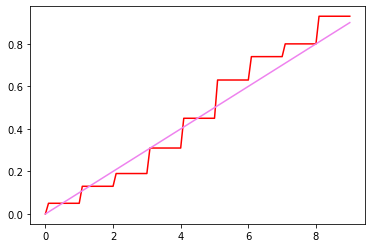

In [59]:
plt.plot(x, y, 'red')
plt.plot(x, y1, 'violet')

In [62]:
delta = np.sqrt(n)*max(list(map(lambda x,y: abs(x-y), y, y1)))
delta

1.3090909090909086

In [64]:
p_val = np.sum([-2*(-1)**(i)*np.exp(-2*i**2*delta**2) for i in range(1,1000)])
p_val

0.06493782081472488

б)

In [154]:
def gauss(x, mean, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * sigma**2) )
gr = [i for i in range(0, 10)]
gr.append(np.inf)
gr

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, inf]

In [164]:
d = np.linspace(0, 9, 10)
teta1 = np.sum(mass*d)/n
#teta2 = (np.sum((mass*d - teta1)**2)/n)**(1/2)

l_max = 0
tetas = np.linspace(1, 10, 100)
for teta in tetas:
    p = []
    for i in range(len(gr) - 1):
        p.append(integrate.quad(gauss, gr[i], gr[i+1], args = (teta1, teta))[0])
    l = np.prod(list(map(lambda x, y: x**y, p, mass)))
    if l > l_max:
        l_max = l
        teta2 = teta

In [181]:
print('teta1 = ', teta1)
print('teta2 = ', teta2)

teta1 =  4.77
teta2 =  2.6363636363636367


In [182]:
p = []
for i in range(len(gr) - 1):
    p.append(integrate.quad(gauss, gr[i], gr[i+1], args = (teta1, teta2))[0])
p = np.array(p)    

In [183]:
p

array([0.04115711, 0.07034206, 0.10428889, 0.13412749, 0.14964323,
       0.14482951, 0.12159547, 0.08855971, 0.05595129, 0.05430384])

In [184]:
delta = np.sum((mass-p*n)**2/(p*n))
delta

14.553725224654213

## Колмогоров

In [174]:
N = 50000
x = []
for i in range(len(mass)):
    x.extend([i for j in range(mass[i])])
    
d_k = []
for i in range(N):
    x1 = np.random.normal(teta1, teta2, n)
    y = np.linspace(0, max(max(x1), 9), 100)
    f1 = [np.sum(x<i)/n for i in y]
    f2 = [np.sum(x1<i)/n for i in y]
    t = 10*max(list(map(lambda x,y: abs(x-y), f1, f2)))
    d_k.append(t)
d_k = np.sort(np.array(d_k))

In [185]:
k = len(d_k[d_k<14.55])
p_value = 1-((k-1)/N)
p_value

2.0000000000020002e-05

c)

In [198]:
teta2 = np.sum(mass*d**2)/100
teta2 = np.sqrt(teta2 - teta1**2)

In [199]:
print('teta1 = ', teta1)
print('teta2 = ', teta2)

teta1 =  4.77
teta2 =  2.5054141374231933


In [201]:
N = 50000
d_x = []
for i in range(N):
    x1 = np.random.normal(teta1, teta2, n)
    mean_t = np.mean(x1)
    sigma_t = np.std(x1)
    p_c = []
    for i in range(len(gr)-1):
        p_c.append(integrate.quad(gauss, gr[i], gr[i+1], args = (mean_t, sigma_t))[0])
    nums = [len(x1[(x1 >= gr[i]) & (x1 <= gr[i+1])]) for i in range(len(gr)-1)]
    d_x.append(sum(((nums[i] - n*p_c[i])**2)/(n*(p_c[i]+0.00001)) for i in range(len(p_c))))    
d_x = np.sort(np.array(d_x))

In [204]:
k = len(d_x[d_x<14.55])
p_value = 1-((k-1)/N)
p_value

0.05356000000000005

In [221]:
def hi2(x, k):
    return 3*gammainc(k/2, x/2)/gamma(k/2)
x = np.linspace(0, 30, 1000)
hi_7 = []
hi_9 = []
for i in x:
    hi_7.append(integrate.quad(chi2.pdf, 0, i, args=7)[0])
    hi_9.append(integrate.quad(chi2.pdf, 0, i, args=9)[0])
deltas = [len(d_x[d_x<i])/N for i in x]    

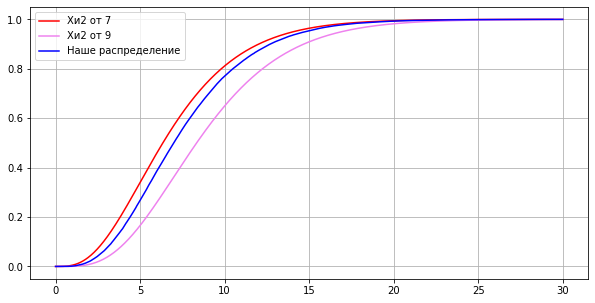

In [230]:
plt.subplots(figsize=(10,5))
plt.plot(x , hi_7, 'red', label = 'Xи2 от 7')
plt.plot(x , hi_9, 'violet', label = 'Xи2 от 9')
plt.plot(x , deltas, 'blue', label = 'Наше распределение')
plt.legend()
plt.grid()